## MCMC - Metropolis-Hasting algorithm sample

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## Let's make a sample distribution
x = np.linspace(-8,8,100)
mean1, sig1 = -1, 1.5
mean2, sig2 = 3, 1
mix1 = 1/(np.sqrt(2*np.pi)*sig1)*np.exp(-0.5*((x-mean1)/sig1)**2)
mix2 = 1/(np.sqrt(2*np.pi)*sig2)*np.exp(-0.5*((x-mean2)/sig2)**2)

mix_dist = 0.4*mix1+0.6*mix2

In [3]:
def mixture_gaussian(x):
    mean1, sig1 = -1, 1.5
    mean2, sig2 = 3, 1
    mix1 = 1/(np.sqrt(2*np.pi)*sig1)*np.exp(-0.5*((x-mean1)/sig1)**2)
    mix2 = 1/(np.sqrt(2*np.pi)*sig2)*np.exp(-0.5*((x-mean2)/sig2)**2)

    return 0.4*mix1+0.6*mix2 

In [4]:
# initial guess
x0 = 0
y = mixture_gaussian(x0)

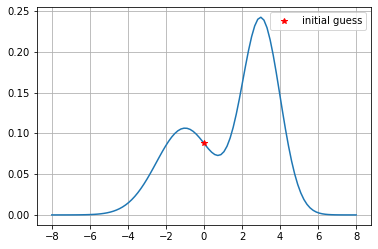

In [5]:
plt.plot(x,mix_dist)
plt.plot(x0,y,'r*',label='initial guess')
plt.grid()
plt.legend()

From above figure, we can figure out the optimal sampling point is x=3 (or suboptimal x=-1)

In [6]:
# Metro-polis hasting algorithm
def Metropolis_Hasting(x_old,x_new,function):
    '''
    x_old: original position
    x_new: newly suggested position
    function: sampling function --> we have to maximize
    '''
    # np.random.normal can be modified in your choice
    num = function(x_new)*np.random.normal(x_new,1)
    den = function(x_old)*np.random.normal(x_old,1)
    if den == 0:
        acceptance = 1
    else:
        acceptance = num/den
    
    if acceptance >= 1:
        result = x_new
    else:
        result = x_old
    return result

# Trial

Final position -0.5815831103003889


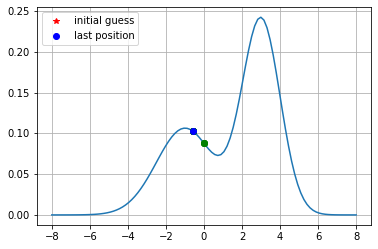

In [13]:
# for loop do
dev = 1
iter_num = 10
record = np.zeros((iter_num,2))
x_old = 0
x_new = np.random.normal(x_old,dev)
for i in range(iter_num):
    x_old = Metropolis_Hasting(x_old,x_new,mixture_gaussian)
    record[i,0] = x_old
    record[i,1] = mixture_gaussian(x_old)
    x_new = np.random.normal(x_old,dev)

# plotting
plt.plot(x,mix_dist)
plt.plot(x0,y,'r*',label='initial guess')
plt.plot(record[:,0],record[:,1],'go')
plt.plot(record[-1,0],record[-1,1],'bo',label='last position')
plt.grid()
plt.legend()
print('Final position',record[-1,0])

Final position 3.1406407759393016


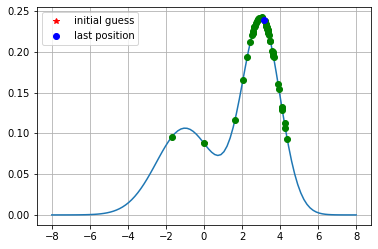

In [14]:
# for loop do
dev = 1
iter_num = 5000
record = np.zeros((iter_num,2))
x_old = 0
x_new = np.random.normal(x_old,dev)
for i in range(iter_num):
    x_old = Metropolis_Hasting(x_old,x_new,mixture_gaussian)
    record[i,0] = x_old
    record[i,1] = mixture_gaussian(x_old)
    x_new = np.random.normal(x_old,dev)
    
# plotting
plt.plot(x,mix_dist)
plt.plot(x0,y,'r*',label='initial guess')
plt.plot(record[::100,0],record[::100,1],'go')
plt.plot(record[-1,0],record[-1,1],'bo',label='last position')
plt.grid()
plt.legend()
print('Final position',record[-1,0])